## Observations and Insights 

In [ ]:
# Three Observations 
# - The first identifiable observation that I made was the almost equal distribtion of male to female mice. 
# Female	124	49.799197
# Male	125	50.200803
# The pie chart shows a clear equal distribution of male to female mice in the data set 
# -The second observation that I made from ctypes import sizeof
# from xml.dom.xmlbuilder import _DOMInputSourceCharacterStreamType
# from the data was the tumor size for mice that were given the 
# Ramicane had the lowest median tumor size by volume at 36.56, where as Infubinol had the highest 
# median tumor size by volume at 60.16. 
# -The third observation that I made was from the Capomulin line chart that showed a large decrease in tumor size
# within the first 10 days then again after the 10th day within the 20th day range. The interesting obersvation 
# from this line graph shows a slow increase in tumor size the 15 days thereafter. This might indicate the 
# drugs effectiveness wayning withing certain periods of the regime. 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = 'outer' )

# Display the data table for preview
combined_data.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [2]:
# Checking the number of mice.
mice = combined_data ["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
get_all_duplicateID = pd.DataFrame(duplicate_miceID)
get_all_duplicateID


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_miceID) == False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_num_mice = len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_of_regimen = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mean_of_regimen

median_of_regimen = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
median_of_regimen

var_of_regimen = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
var_of_regimen

std_of_regimen = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_of_regimen

sem_of_regimen = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_of_regimen




Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# create summary of stats in a table

stats_sum_table = pd.DataFrame({"Mean": mean_of_regimen, "Median": median_of_regimen, "Variance": var_of_regimen, 
"Standard Deviation": std_of_regimen, "SEM": sem_of_regimen})
stats_sum_table
stats_sum_table.to_csv("fileOne.csv", index = False, header = True)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
stats_sum_table_2 = single_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
stats_sum_table_2


C:\Users\AndrewCho\AppData\Local\Temp\ipykernel_20400\3878152977.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_sum_table_2 = single_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

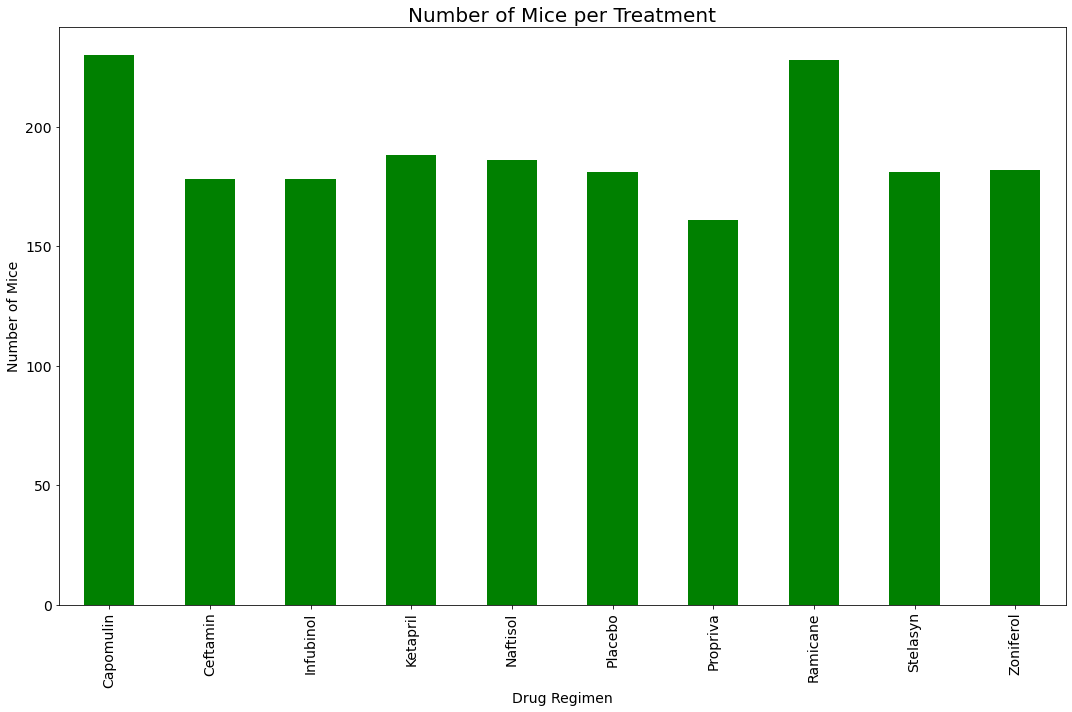

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count_pertreat = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mice_count_pertreat.plot.bar(figsize = (15,10), color = 'g', fontsize = 14)
mice_count_pertreat
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)
plt.title("Number of Mice per Treatment", fontsize = 20)

plt.savefig("../Images/Laboratory.jpg", bbox_inches = "tight")
plt.tight_layout()
plt.show()

mice_count_pertreat

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create an array that contains the number of mice each drug regimen has

list_mice = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
list_mice

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

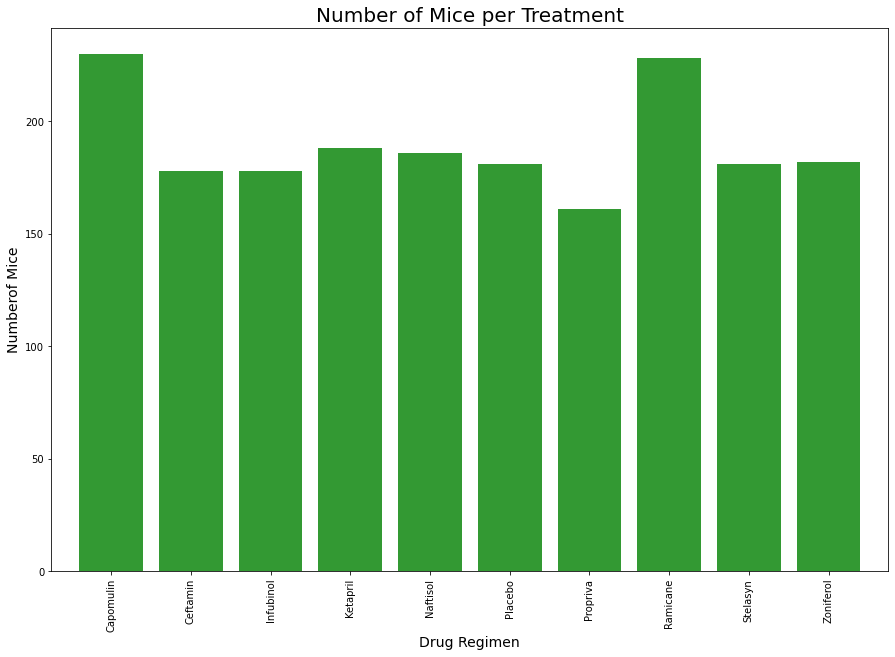

In [26]:
x_axis = np.arange(len(mice_count_pertreat))
fig1, ax1 = plt.subplots(figsize = (15,10))
plt.bar (x_axis, list_mice, color = 'g', alpha = 0.8, align = 'center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of Mice per Treatment", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Numberof Mice", fontsize = 14)

plt.savefig("../Images/Laboratory.jpg", bbox_inches = "tight")


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First group by gender and get the number to plot

gender_groupby = combined_data.groupby(["Mouse ID", "Sex"])
gender_groupby
gender_df = pd.DataFrame(gender_groupby.size())

# Create the dataframe with totla county of female and male mice
gender_of_mice = pd.DataFrame (gender_df.groupby(["Sex"]).count())
gender_of_mice.columns = ["Total Count"]

#create and formate percentage of female vs male mice
gender_of_mice ["Percentage of Sex"] = (100*(gender_of_mice["Total Count"]/gender_of_mice["Total Count"].sum()))

# format the "percentage of Sex" column
gender_of_mice["Percentage of Sex"] = gender_of_mice["Percentage of Sex"]

# Display Dataframe
gender_of_mice


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


TypeError: axis() got an unexpected keyword argument 'fontsize'

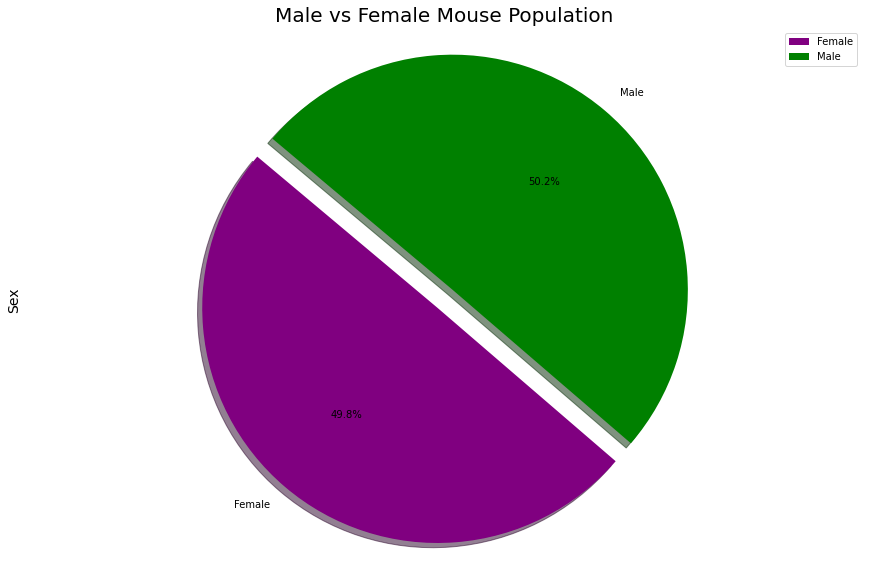

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['purple', 'green']
explode = (0.1, 0)
plot = gender_of_mice.plot.pie( y = 'Total Count', figsize = (15,10), colors = colors, startangle = 140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex', fontsize = 14)
plt.axis('Equal', fontsize = 14)

plt.savefig("../Images/Laboratory.jpg", bbox_inches = "tight")
plt.show()


TypeError: axis() got an unexpected keyword argument 'fontsize'

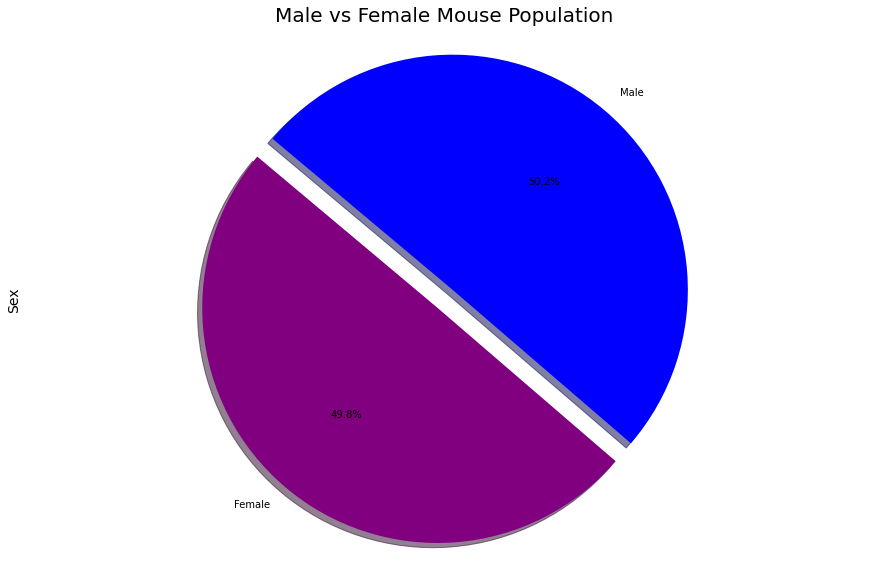

In [32]:
#Generate a pie plot showing distribution of female versus male mice using pyplo 

# Create labels for the sections of the pie chart
labels = ["Female", "Male"]

#List the values of each section of the pie shart
sizes = [49.799197, 50.200803]

#set colors of each section of the pie chart
colors = ['purple', 'blue']

# determine which section of the circle to detach
explode = (0.1, 0)

#create the pie chart based upon the values
fig1, ax1 = plt.subplots(figsize = (15,10))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140,)
plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.ylabel('Sex', fontsize = 14)

#Set equal axis
plt.axis("Equal", fontsize = 14)

plt.savefig("../Images/Laboratory.jpg", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [36]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lower_bound = quartiles[0.25]
upper_bound = quartiles[0.75]
IQR = upper_bound-lower_bound


print(f"The lower quartile of Capomulin tumors: {lower_bound}")
print(f"The upper quartile of Capomulin tumors: {upper_bound}")
print(f"The interquartile range of Capomulin tumors: {IQR}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lower_bound - (1.5*IQR)
upper_bound = upper_bound + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [39]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
# Ramicane_merge.to_csv("output.csv")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [37]:

# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lower_bound = quartiles[0.25]
upper_bound = quartiles[0.75]
IQR = upper_bound-lower_bound


print(f"The lower quartile of Ramicane tumors is: {lower_bound}")
print(f"The upper quartile of Ramicane tumors is: {upper_bound}")
print(f"The interquartile range of Ramicane tumors is: {IQR}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lower_bound - (1.5*IQR)
upper_bound = upper_bound + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [40]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [41]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lower_bound = quartiles[0.25]
upper_bound = quartiles[0.75]
IQR = upper_bound-lower_bound


print(f"The lower quartile of Infubinol tumors is: {lower_bound}")
print(f"The upper quartile of Infubinol tumors is: {upper_bound}")
print(f"The interquartile range of Infubinol tumors is: {IQR}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lower_bound - (1.5*IQR)
upper_bound = upper_bound + (1.5*IQR)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [43]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [44]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lower_bound = quartiles[0.25]
upper_bound = quartiles[0.75]
IQR = upper_bound-lower_bound

print(f"The lower quartile of treatment is: {lower_bound}")
print(f"The upper quartile of temperatures is: {upper_bound}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lower_bound - (1.5*IQR)
upper_bound = upper_bound + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
completed

# Create empty list to fill with tumor vol data (for plotting)
completd

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
completed
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    completed
    
    # add subset 
    completed
    
    # Determine outliers using upper and lower bounds
    completed

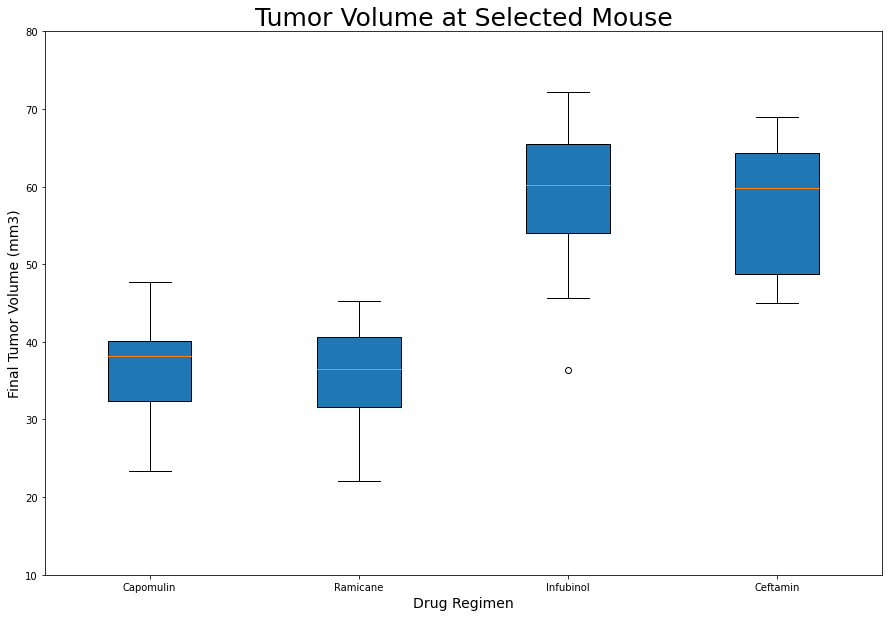

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [47]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


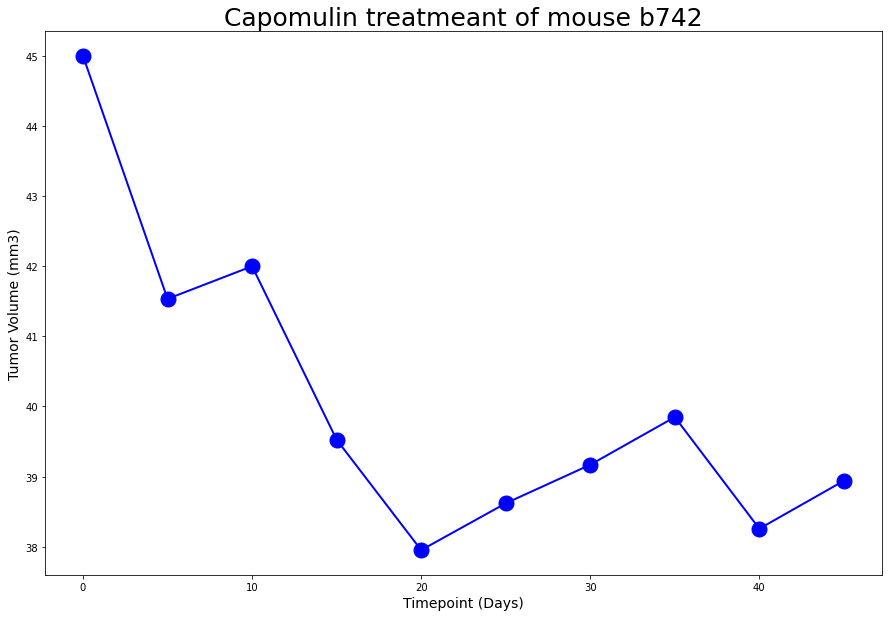

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

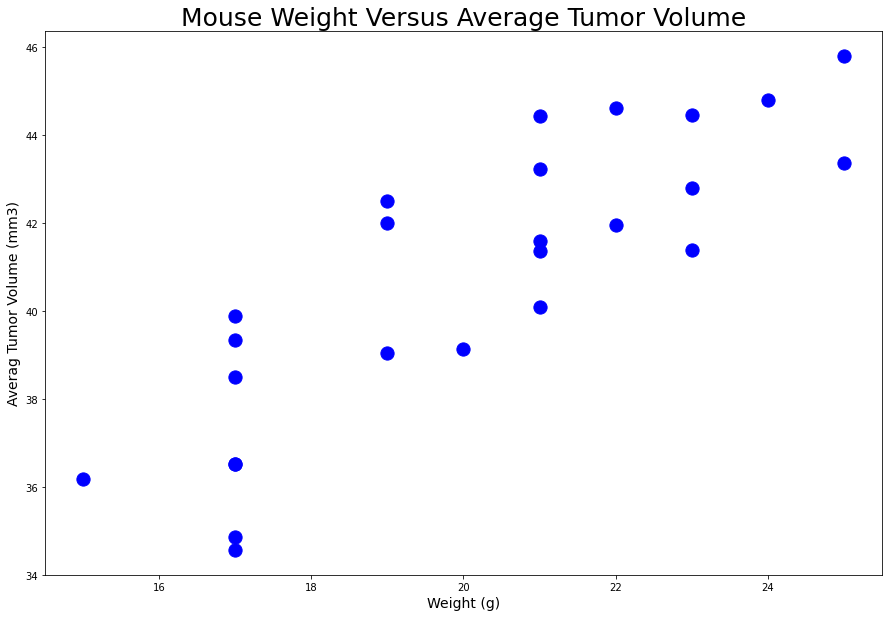

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avgerage_cap_volume =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avgerage_cap_volume['Weight (g)'],avgerage_cap_volume['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avgerage_cap_volume['Weight (g)'],avgerage_cap_volume['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [52]:
x_values = avgerage_cap_volume['Weight (g)']
y_values = avgerage_cap_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


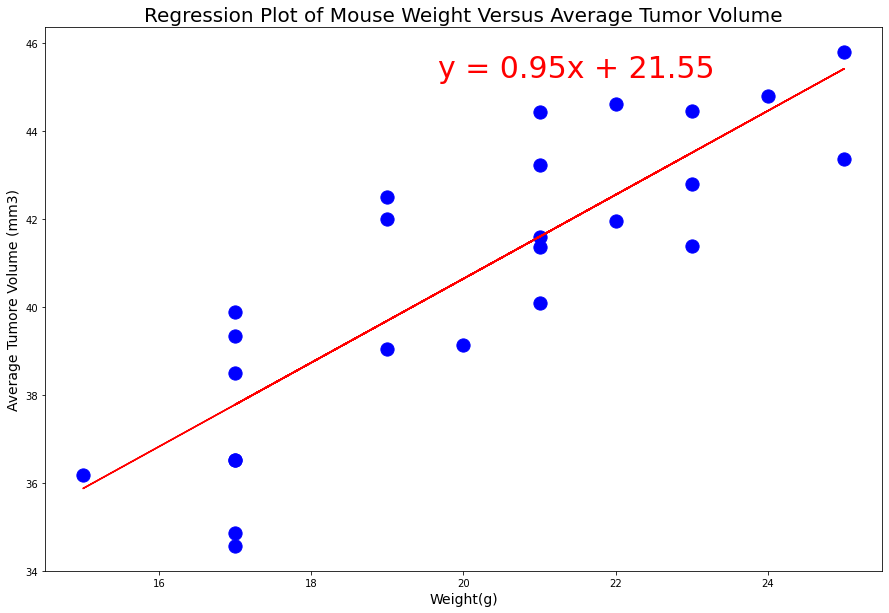

In [53]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()